# Wine Quality Prediction Using Machine Learning

## Project Description
This project focuses on predicting the quality of wine based on its chemical characteristics. Machine learning classification models are used to analyze chemical properties such as acidity and density to predict wine quality.


## Learning Objectives
- Understand classification techniques
- Analyze chemical properties of wine
- Build and evaluate multiple ML models
- Compare model performances


## Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Data Collection
The dataset contains chemical properties of wine samples along with quality labels.


In [2]:
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Dataset Overview


In [3]:
df.shape


(1143, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Data Cleaning
Checking and handling missing values.


In [6]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.dropna(inplace=True)


## Data Visualization
Exploring relationships between important chemical features.


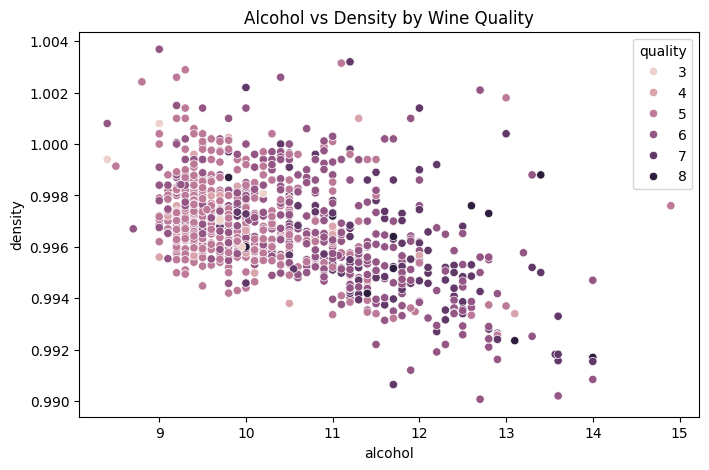

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='alcohol', y='density', hue='quality', data=df)
plt.title("Alcohol vs Density by Wine Quality")
plt.show()


## Feature Selection
Separating input features and target variable.


In [10]:
X = df.drop('quality', axis=1)
y = df['quality']


## Feature Scaling
Standardizing features for better model performance.


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Train-Test Split
Dividing dataset into training and testing sets.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Model 1: Random Forest Classifier


In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


## Model 2: Stochastic Gradient Descent Classifier


In [24]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)


## Model 3: Support Vector Classifier (SVC)


In [25]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)


## Model Evaluation
Comparing model performances.


In [26]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SGD Accuracy:", accuracy_score(y_test, sgd_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))


Random Forest Accuracy: 0.6855895196506551
SGD Accuracy: 0.5589519650655022
SVC Accuracy: 0.6593886462882096


## Classification Reports


In [27]:
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
print("SGD Report:\n", classification_report(y_test, sgd_pred))
print("SVC Report:\n", classification_report(y_test, svc_pred))


Random Forest Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.67      0.69      0.67       229

SGD Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.59      0.64        96
           6       0.55      0.58      0.56        99
           7       0.31      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.31      0.34      0.32       229
weighted avg       0.57      0.56      0.

C:\Users\Adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Adity\anaconda3\Lib

## Confusion Matrix (Best Model)


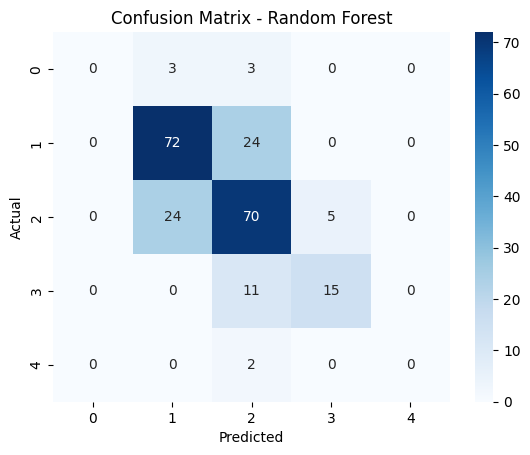

In [28]:
best_pred = rf_pred

cm = confusion_matrix(y_test, best_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion
Random Forest Classifier achieved the best performance among the tested models. The results show that chemical properties can effectively predict wine quality.


## Save Results


In [29]:
results = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality': best_pred
})

results.to_csv("wine_quality_predictions.csv", index=False)
